## Data Manipulation

This file is responsible for importing the different csv files and preparing the data for analysis. At the end of this file, the resulting dataframe is exported as a csv and used later for analysis. 


Import packages

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


Read in the data files

In [57]:
# read in all of the data: regular season compact, regular season detailed, seasons, teams
# tourney compact, tourney detailed, tourney seeds, tourney slots 
regcompact = pd.read_csv("RegularSeasonCompactResults.csv")
regdetailed = pd.read_csv("RegularSeasonDetailedResults.csv")
seasons = pd.read_csv("Seasons.csv")
teams = pd.read_csv("Teams.csv")
tourneycompact = pd.read_csv("TourneyCompactResults.csv")
tourneydetailed = pd.read_csv("TourneyDetailedResults.csv")
tourneyseeds = pd.read_csv("TourneySeeds.csv")
tourneyslots = pd.read_csv("TourneySlots.csv")
kenpom = pd.read_csv("KenPomCSV0316.csv")

In [58]:
# Create an ID for the winning and losing teams in the regular detailed and tourney detailed 

regdetailed['WteamID'] = regdetailed['Wteam'].map(str) + regdetailed['Season'].map(str)
regdetailed['LteamID'] = regdetailed['Lteam'].map(str) + regdetailed['Season'].map(str)

tourneydetailed['WteamID'] = tourneydetailed['Wteam'].map(str) + tourneydetailed['Season'].map(str)
tourneydetailed['LteamID'] = tourneydetailed['Lteam'].map(str) + tourneydetailed['Season'].map(str)

In [59]:
# Add the Seed for Each Team

for i in range(0,len(tourneydetailed)):

    tourneydetailed.ix[i,"LKen_Name"] = teams['Ken_Name'][teams['Team_Id']==tourneydetailed.ix[i,'Lteam']].values[0]
    tourneydetailed.ix[i,"WKen_Name"] = teams['Ken_Name'][teams['Team_Id']==tourneydetailed.ix[i,'Wteam']].values[0]
    

In [60]:
# there were two names that changed over the years in the Kenpom database, so manually change those 

tourneydetailed.ix[32,"LKen_Name"] = "Troy St."
tourneydetailed.ix[647,"LKen_Name"] = "Middle Tennessee"


In [61]:
# Create an ID of KenPom name and Season

tourneydetailed["WKen_Name_ID"] = tourneydetailed['WKen_Name'].map(str) + tourneydetailed['Season'].map(str)
tourneydetailed["LKen_Name_ID"] = tourneydetailed['LKen_Name'].map(str) + tourneydetailed['Season'].map(str)

In [62]:
# merge the kenpom data with the tournament data 

for i in range(0,len(tourneydetailed)):
    tourneydetailed.ix[i,"LKen"] = kenpom['EM'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WKen"] = kenpom['EM'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LAdjDE"] = kenpom['AdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WAdjDE"] = kenpom['AdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LAdjOE"] = kenpom['AdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WAdjOE"] = kenpom['AdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LTempo"] = kenpom['AdjTempo'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WTempo"] = kenpom['AdjTempo'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LDERank"] = kenpom['RankAdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WDERank"] = kenpom['RankAdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LOERank"] = kenpom['RankAdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WOERank"] = kenpom['RankAdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    #tourneydetailed.ix[i,"LExp"] = kenpom['Exp'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    #tourneydetailed.ix[i,"WExp"] = kenpom['Exp'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    #tourneydetailed.ix[i,"LBench"] = kenpom['Bench'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    #tourneydetailed.ix[i,"WBench"] = kenpom['Bench'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    

In [63]:
# Create a Team_ID for the tourneyseed database

tourneyseeds['Team_Id'] = tourneyseeds['Team'].map(str) + tourneyseeds['Season'].map(str)

for i in range(len(tourneyseeds)):
    tourneyseeds.ix[i,'SeedNum'] = int(tourneyseeds.ix[i,'Seed'][1:3])

In [64]:
# Add the Seed for Each Team to tourney detailed

for i in range(0,len(tourneydetailed)):

    tourneydetailed.ix[i,"LSeed"] = tourneyseeds['Seed'][tourneyseeds['Team_Id']==tourneydetailed.ix[i,'LteamID']].values[0]
    tourneydetailed.ix[i,"WSeed"] = tourneyseeds['Seed'][tourneyseeds['Team_Id']==tourneydetailed.ix[i,'WteamID']].values[0]


In [65]:
# Get the No. seed from the total seed — that is, turn W01 to 1, etc. 

for i in range(0,len(tourneydetailed)):
    if (len(tourneydetailed.ix[i,"WSeed"])==3):
        tourneydetailed.ix[i,"WSeedNum"] = int(tourneydetailed.ix[i,"WSeed"][-2:])
    else: 
        tourneydetailed.ix[i,"WSeedNum"] = int(tourneydetailed.ix[i,"WSeed"][1:3])
    if (len(tourneydetailed.ix[i,"LSeed"])==3):
        tourneydetailed.ix[i,"LSeedNum"] = int(tourneydetailed.ix[i,"LSeed"][-2:])
    else: 
        tourneydetailed.ix[i,"LSeedNum"] = int(tourneydetailed.ix[i,"LSeed"][1:3])

In [66]:
# some of these are the "play-in" games (like 16 vs. 16). just making a note of those to eliminate later 

for i in range(0,len(tourneydetailed)):
    if (tourneydetailed.ix[i,"WSeed"][0:3]==tourneydetailed.ix[i,"LSeed"][0:3]):
        tourneydetailed.ix[i,"Play-In"] = 1
    else:
        tourneydetailed.ix[i,"Play-In"] = 0

In [67]:
# calculate how many field goals they assist on 

regdetailed['Wastratio'] = regdetailed['Wast'] / regdetailed['Wfgm']
regdetailed['Lastratio'] = regdetailed['Last'] / regdetailed['Lfgm']

In [68]:
# calculate dr rate

regdetailed['Wdrratio'] = 1 / ((regdetailed['Lfga'] - regdetailed['Lfgm']) / regdetailed['Wdr'])
regdetailed['Ldrratio'] = 1 / ((regdetailed['Wfga'] - regdetailed['Wfgm']) / regdetailed['Ldr'])

In [69]:
# calculate or rate 

regdetailed['Worratio'] = 1 / ((regdetailed['Wfga'] - regdetailed['Wfgm']) / regdetailed['Wor'])
regdetailed['Lorratio'] = 1 / ((regdetailed['Lfga'] - regdetailed['Lfgm']) / regdetailed['Lor'])

In [70]:
# calculate point diff in regular season games. 

regdetailed['ptdiff'] = ((regdetailed['Wscore'] - regdetailed['Lscore']))

In [71]:
# calc 2pt fg %, 3pt fg %

regdetailed['W2fgper'] = (regdetailed['Wfgm'] - regdetailed['Wfgm3']) / (regdetailed['Wfga'] - regdetailed['Wfga3'])
regdetailed['W3fgper'] = (regdetailed['Wfgm3'] / regdetailed['Wfga3'])

regdetailed['L2fgper'] = (regdetailed['Lfgm'] - regdetailed['Lfgm3']) / (regdetailed['Lfga'] - regdetailed['Lfga3'])
regdetailed['L3fgper'] = (regdetailed['Lfgm3'] / regdetailed['Lfga3'])

regdetailed['W3fgshot'] = regdetailed['Wfga3'] / (regdetailed['Wfga3'] + (regdetailed['Wfga'] - regdetailed['Wfga3']) +regdetailed['Wfta'])
regdetailed['Wftshot'] = regdetailed['Wfta'] / (regdetailed['Wfga3'] + (regdetailed['Wfga'] - regdetailed['Wfga3']) +regdetailed['Wfta'])

regdetailed['L3fgshot'] = regdetailed['Lfga3'] / (regdetailed['Lfga3'] + (regdetailed['Lfga'] - regdetailed['Lfga3']) +regdetailed['Lfta'])
regdetailed['Lftshot'] = regdetailed['Lfta'] / (regdetailed['Lfga3'] + (regdetailed['Lfga'] - regdetailed['Lfga3']) +regdetailed['Lfta'])




    


In the code below, we create a variable for the round in which the tournament is played. This variable can be used in conjuction with others as an interaction term to vary the significance of certain predictors as one advances further into the tournament. 

For example, tournament seeding tends to be a good predictor of success early in the tournament, however were a 10-seed to meet a 1-seed in the Elite Eight or Final Four, as Syracuse did in last year's tournament, we would expect the 10-seed to have a better chance of winning this game than they would for a second round game against a 2-seed. This is because the fact that the 10-seed advanced that far into the tournament suggests that they are either playing at a level better than their seed or they were misseeded in the first place. 

In 2016, Syracuse, a 10-seed, beat 1-seed Virginia in the Elite Eight and advanced to the Final Four, where they were defeated by 1-seed North Carolina. 

In [72]:
# designates round in tournament for each game

for i in range(0,len(tourneydetailed)):
    if (tourneydetailed.ix[i,"Play-In"]==1):
        tourneydetailed.ix[i,'round'] = 0
    elif ((tourneydetailed.ix[i,"Daynum"]==136) or (tourneydetailed.ix[i,"Daynum"]==137)):
        tourneydetailed.ix[i,'round'] = 1
    elif ((tourneydetailed.ix[i,"Daynum"]==138) or (tourneydetailed.ix[i,"Daynum"]==139)):
        tourneydetailed.ix[i,'round'] = 2
    elif ((tourneydetailed.ix[i,"Daynum"]==143) or (tourneydetailed.ix[i,"Daynum"]==144)):
        tourneydetailed.ix[i,'round'] = 3
    elif ((tourneydetailed.ix[i,"Daynum"]==145) or (tourneydetailed.ix[i,"Daynum"]==146)):
        tourneydetailed.ix[i,'round'] = 4
    elif (tourneydetailed.ix[i,"Daynum"]==152):
        tourneydetailed.ix[i,'round'] = 5
    elif (tourneydetailed.ix[i,"Daynum"]==154):
        tourneydetailed.ix[i,'round'] = 6
    




Here, we take an idea from Ezekowitz (2011) in which we calculate the dot product of regular season wins against tournament teams and the inverse of the opponent seed for each team in the tourney. We then take the square root of this amount because the data was right-skewed, since there are a lot of teams in the tourney from small conferences that only send one team to the tournament. 

In [73]:
# get all tournament teams in database

all_tourney_teamIDs = pd.Series(np.concatenate((tourneydetailed['WteamID'].unique(),tourneydetailed['LteamID'].unique()),axis=0)).unique()

#
# takes team ID, regular season data, and tournament data
#
#
# returns two fractions

def team_performance_lookup (teamID, regdetailed, tourneydetailed):
    # creates empty dataframe
    df = pd.DataFrame()
    
    # these are the IDs of every tournament team that this team beat 
    good_wins = regdetailed[regdetailed['WteamID'].isin([teamID])]['LteamID']
    
    # these are the IDs of every tournament team that beat this team
    meh_losses = regdetailed[regdetailed['LteamID'].isin([teamID])]['WteamID']
    
    # want to selected second column b/c first is index
    # calculates for 
    good_win_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(good_wins)]

    # combines the wins together, takes only the seed number
    good_win_seeds = good_win_seeds.map(lambda x: float(1) / int(x))
        
    meh_losses_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(meh_losses)]
    
    meh_losses_seeds = meh_losses_seeds.map(lambda x: float(1) / int(x))
    
    good_win_sum = np.sum(good_win_seeds)**.5
    meh_losses_sum = np.sum(meh_losses_seeds)**.5
    
    #print good_wins.shape
    return teamID, good_win_sum, meh_losses_sum

teams_seeded_wins = []


for team in all_tourney_teamIDs:
    teams_seeded_wins.append(team_performance_lookup(team, regdetailed, tourneydetailed))


teams_seeded_wins = pd.DataFrame(teams_seeded_wins, columns = ['ID', 'good_win', 'meh_losses'])

[('14212003', 0.0, 1.4074631010979934), ('11122003', 1.475439960460295, 0.6123724356957945), ('11132003', 0.6871842709362768, 1.6414763002993509), ('11412003', 0.0, 0.0), ('11432003', 0.689202437604511, 1.3601470508735443), ('11632003', 0.8139410298049853, 1.224744871391589), ('11812003', 1.0540925533894598, 0.8819171036881969), ('12112003', 0.6132441406718666, 1.2698965952538666), ('12282003', 0.8737803290828098, 0.8600479868487221), ('12422003', 1.3301071316570638, 1.7004901254246279), ('12662003', 1.036822067666386, 0.8366600265340756), ('12812003', 1.4094136676103601, 1.8303005217723127), ('13232003', 1.4361406616345072, 1.4832396974191324), ('13282003', 1.1570179238847063, 1.2780193008453877), ('13902003', 1.514742369000235, 1.118033988749895), ('14092003', 0.0, 0.7817359599705717), ('14582003', 0.8255589736945623, 1.092906420717), ('11202003', 0.5991064775384851, 1.4148933093781584), ('11392003', 0.40032038451271784, 0.6454972243679028), ('11962003', 1.091634859587521, 1.17260393

In [74]:
# drop if a play-in game 

tourneydetailed = tourneydetailed[tourneydetailed['round'] > 0]

tourneydetailed = tourneydetailed.reset_index(drop=True)

In [75]:
# use this as a key to bring statistics into a prediction matrix

winstats = ['Wscore', 'W2fgper', 'W3fgper','Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf','Wastratio','Wdrratio','Worratio','W3fgshot','Wftshot','Lscore', 'L2fgper', 'L3fgper','Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf','Lastratio','Ldrratio','Lorratio','L3fgshot','Lftshot']
losestats = ['Lscore', 'L2fgper', 'L3fgper','Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf','Lastratio','Ldrratio','Lorratio','L3fgshot','Lftshot','Wscore', 'W2fgper', 'W3fgper','Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf','Wastratio','Wdrratio','Worratio','W3fgshot','Wftshot']
col_names = ['scorefor','2fgperfor', '3fgperfor','orfor','drfor','astfor','tofor','stlfor','blkfor','pffor','astratiofor','drratiofor','orratiofor','pot3ptsfor','potftptsfor','scoreag','2fgperag', '3fgperag','orag','drag','astag','toag','stlag','blkag','pfag','astratioag','drratioag','orratioag','pot3ptsag','potftptsag']

d = {'winstats': winstats, 'losestats': losestats,'col_names': col_names}
key = pd.DataFrame(data=d)


In [76]:
# accumulate reg season stats of winner, loser in each tournament game 

new_tourney_stats_winner = pd.DataFrame(np.zeros((len(tourneydetailed),30)))
new_tourney_stats_loser = pd.DataFrame(np.zeros((len(tourneydetailed),30)))

for i in range(0,len(new_tourney_stats_winner)):
    for j in range(0,30):
        new_tourney_stats_winner.iloc[i,j] = np.mean(np.append(regdetailed[key.iloc[j,2]]
                                            [(regdetailed['Wteam']==tourneydetailed.ix[i,'Wteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])],
                                            regdetailed[key.iloc[j,1]]
                                            [(regdetailed['Lteam']==tourneydetailed.ix[i,'Wteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])]))

for i in range(0,len(new_tourney_stats_loser)):
    for j in range(0,30):
        new_tourney_stats_loser.iloc[i,j] = np.mean(np.append(regdetailed[key.iloc[j,2]]
                                            [(regdetailed['Wteam']==tourneydetailed.ix[i,'Lteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])],
                                            regdetailed[key.iloc[j,1]]
                                            [(regdetailed['Lteam']==tourneydetailed.ix[i,'Lteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])]))


We then compile each team's statistics into a dataframe which has the favorite on one side and underdog on the other. It's worth noting that we squae-rooted seednum because the distribution was right skewed due to very few high seeds making it past the first two rounds. 

In [90]:
# we want to determine failures and successes. Therefore, we will call a game a success if the higher ranked team wins 
# so, we have to reorganize data from winning seed and losing seed to high seed and low seed

prediction_matrix = pd.DataFrame(np.zeros((len(tourneydetailed),76)))

for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"] > tourneydetailed.ix[i,"LSeedNum"]):
        x = pd.concat([new_tourney_stats_loser.iloc[i,:], pd.Series(tourneydetailed.ix[i,'LKen'])
                       ,pd.Series(tourneydetailed.ix[i,'LAdjOE']),
                       pd.Series(tourneydetailed.ix[i,'LAdjDE']),pd.Series(tourneydetailed.ix[i,'LTempo']),
                       pd.Series(tourneydetailed.ix[i,'LDERank']),pd.Series(tourneydetailed.ix[i,'LOERank']),
                       pd.Series(tourneydetailed.ix[i,'LSeedNum']**.5),
                       pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,2)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"LteamID"]].values).reshape(1,)),
                       new_tourney_stats_winner.iloc[i,:],
                       pd.Series(tourneydetailed.ix[i,'WKen']),pd.Series(tourneydetailed.ix[i,'WAdjOE']),
                       pd.Series(tourneydetailed.ix[i,'WAdjDE']),pd.Series(tourneydetailed.ix[i,'WTempo']),
                       pd.Series(tourneydetailed.ix[i,'WDERank']),pd.Series(tourneydetailed.ix[i,'WOERank']),
                       pd.Series(tourneydetailed.ix[i,'WSeedNum']**.5),
                      pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,2)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"WteamID"]].values).reshape(1,))], axis=0)
        prediction_matrix.iloc[i,:] = np.array(x)
        prediction_matrix = pd.DataFrame(prediction_matrix)
    else:
        x = pd.concat([new_tourney_stats_winner.iloc[i,:], 
               pd.Series(tourneydetailed.ix[i,'WKen']),pd.Series(tourneydetailed.ix[i,'WAdjOE']),
               pd.Series(tourneydetailed.ix[i,'WAdjDE']),pd.Series(tourneydetailed.ix[i,'WTempo']),
                pd.Series(tourneydetailed.ix[i,'WDERank']),pd.Series(tourneydetailed.ix[i,'WOERank']),
                        pd.Series(tourneydetailed.ix[i,'WSeedNum']**.5),
                       pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,2)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"WteamID"]].values).reshape(1,)),
               new_tourney_stats_loser.iloc[i,:],
               pd.Series(tourneydetailed.ix[i,'LKen']),pd.Series(tourneydetailed.ix[i,'LAdjOE']),
               pd.Series(tourneydetailed.ix[i,'LAdjDE']),pd.Series(tourneydetailed.ix[i,'LTempo']),
                pd.Series(tourneydetailed.ix[i,'LDERank']),pd.Series(tourneydetailed.ix[i,'LOERank']),
                pd.Series(tourneydetailed.ix[i,'LSeedNum']**.5),
                pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,2)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"LteamID"]].values).reshape(1,))], axis=0)
        prediction_matrix.iloc[i,:] = np.array(x)
        prediction_matrix = pd.DataFrame(prediction_matrix)    

# standardize the data         

from sklearn import preprocessing
prediction_matrix = preprocessing.scale(prediction_matrix)
prediction_matrix = pd.DataFrame(prediction_matrix)

# name the columns 
        
prediction_matrix = pd.DataFrame(prediction_matrix)    
prediction_matrix.columns = ['team1scorefor','team12fgperfor', 'team13fgperfor','team1orfor','team1drfor','team1astfor','team1tofor','team1stlfor','team1blkfor','team1pffor','team1astratiofor','team1drratiofor','team1orratiofor','team1pot3ptsfor','team1potftptsfor','team1scoreag','team12fgperag', 'team13fgperag','team1orag','team1drag','team1astag','team1toag','team1stlag','team1blkag','team1pfag','team1astratioag','team1drratioag','team1orratioag','team1pot3ptsag','team1potftptsag',
                             'team1ken', 'team1kenoe','team1kende', 'team1kentempo','team1drank','team1orank',
                             'team1seed',
                             'team1goodwins',
                           'team2scorefor','team22fgperfor', 'team23fgperfor','team2orfor','team2drfor','team2astfor','team2tofor','team2stlfor','team2blkfor','team2pffor','team2astratiofor','team2drratiofor','team2orratiofor','team2pot3ptsfor','team2potftptsfor','team2scoreag','team22fgperag', 'team23fgperag','team2orag','team2drag','team2astag','team2toag','team2stlag','team2blkag','team2pfag','team2astratioag','team2drratioag','team2orratioag','team2pot3ptsag','team2potftptsag',
                            'team2ken', 'team2kenoe','team2kende', 'team2kentempo','team2drank','team2orank',
                            'team2seed',
                            'team2goodwins']


# this is for classification
    
prediction_answers =pd.DataFrame(np.ones((len(tourneydetailed),1)))  
for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"]>tourneydetailed.ix[i,"LSeedNum"]):
        prediction_answers.iloc[i,0] = 0
        
# this is for point differential

        
prediction_answers2 =pd.DataFrame(np.zeros((len(tourneydetailed),1)))  
for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"]<tourneydetailed.ix[i,"LSeedNum"]):
        prediction_answers2.iloc[i,0] = tourneydetailed.ix[i,"Wscore"] - tourneydetailed.ix[i,"Lscore"]
    else:
        prediction_answers2.iloc[i,0] = tourneydetailed.ix[i,"Lscore"] - tourneydetailed.ix[i,"Wscore"]

Next, we want to check for multicollinearity, and remove any variables that are strongly correlated with one another. 

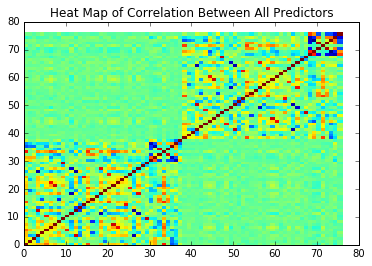

In [91]:
cor_matrix = np.ones((prediction_matrix.shape[1],prediction_matrix.shape[1]))

# calculate correlations for each pair, put in respective positions in matrix 

for i in range(prediction_matrix.shape[1]-1):
    for j in range(i+1,prediction_matrix.shape[1]):
        cor_matrix[i,j] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
        cor_matrix[j,i] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
    
# add row and column labels
    
cor_matrix = pd.DataFrame(cor_matrix, columns=prediction_matrix.columns.values)

#  print cor_matrix.iloc[28,range(20,70)]

# Plot the Color Map (using the pcolor fucntion from lab)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolor(cor_matrix)
ax.set_title("Heat Map of Correlation Between All Predictors")


# saves file for use in poster
plt.savefig('all_predictors')

plt.show()

In [92]:
#
# Check for multicollinearity by caluclating variance inflation factor
#

def vif(x_matrix):
    score = [0] * x_matrix.shape[1]
    for i in range(x_matrix.shape[1]):
        y_vals = x_matrix.iloc[:,i]
        x_vals = x_matrix.drop(x_matrix.columns[i],axis=1)
        regression = Lin_Reg()
        regression.fit(x_vals, y_vals)
        # print r2 for train and test 
        r2 = regression.score(x_vals, y_vals)
        score[i] = 1 / (1-r2)
    return score



In [93]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>1000):
        print prediction_matrix.columns[i]

(819, 76)
team1ken
team1kenoe
team1kende
team2ken
team2kenoe
team2kende


In [94]:
prediction_matrix = prediction_matrix.drop(['team1ken','team2ken'],axis=1)

In [95]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>50):
        print prediction_matrix.columns[i]

(819, 74)
team1scorefor
team1orfor
team1drfor
team1astfor
team1astratiofor
team1orratiofor
team1scoreag
team1orag
team1drag
team1astag
team1astratioag
team1orratioag
team2scorefor
team2orfor
team2drfor
team2astfor
team2astratiofor
team2orratiofor
team2scoreag
team2orag
team2drag
team2astag
team2astratioag
team2orratioag


In [96]:
prediction_matrix = prediction_matrix.drop(['team1scorefor','team1scoreag','team1orfor','team1orag','team2scorefor','team2scoreag','team2orfor','team2orag'],axis=1)

In [97]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>50):
        print prediction_matrix.columns[i]

(819, 66)
team1drfor
team1astfor
team1astratiofor
team1astag
team1astratioag
team2astfor
team2astag


In [98]:
prediction_matrix = prediction_matrix.drop(['team1ken','team2ken'],axis=1)
prediction_matrix = prediction_matrix.drop(['team1scorefor','team1scoreag','team1orfor','team1orag','team2scorefor','team2scoreag','team2orfor','team2orag'],axis=1)
prediction_matrix = prediction_matrix.drop(['team1astfor','team1astag','team2astfor','team2astag'],axis=1)

In [99]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>20):
        print prediction_matrix.columns[i]

(819, 62)
team1drfor
team1drratiofor
team1drag
team1toag
team1drratioag
team1kentempo
team2drfor
team2drag
team2toag
team2drratioag
team2kenoe
team2kende


In [101]:
prediction_matrix = prediction_matrix.drop(['team1drratioag','team1orratioag','team2drratioag','team2orratioag'],axis=1)

In [102]:
prediction_matrix = prediction_matrix.drop(['team1drank','team2drank','team1orank','team2orank'],axis=1)

In [103]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>20):
        print prediction_matrix.columns[i]

(819, 54)
team1drfor
team1toag
team2drfor


In [104]:
prediction_matrix = prediction_matrix.drop(['team1drfor','team1drag','team2drfor',
                                           'team2drag'                          
                                           ],axis=1)

In [105]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>20):
        print prediction_matrix.columns[i]

(819, 50)


With collinearity checked, we will now see if there are any interaction terms that are of interest. There are three that come to mind for us. Two are the interactions between opposing teams offenses and defenses, and the third one is an interaction between the seeds. That is to say, we think the impact of the underdog's seed is largely contingent on the favorite's seed as well.

In [106]:
def add_interaction(x_matrix, int_1, int_2, name):
    x_matrix[name] =  x_matrix[int_1] *  x_matrix[int_2]
    return x_matrix

In [107]:
prediction_matrix = add_interaction(prediction_matrix, 'team1kenoe', 'team2kende', 'team1orank+team2drank')
prediction_matrix = add_interaction(prediction_matrix, 'team2kenoe', 'team1kende', 'team2orank+team1drank')

prediction_matrix = add_interaction(prediction_matrix, 'team1seed', 'team1seed', 'team1seed+team2seed')
 
#prediction_matrix = add_interaction(prediction_matrix, 'team2kentempo', 'team1drank', 'team2kentempo+team1drank')
#prediction_matrix = add_interaction(prediction_matrix, 'team1kentempo', 'team2drank', 'team1kentempo+team2drank')





In addition, we looked around at different variables in different models that currently exist and eliminated some variables that rarely, if ever, made an appearance. 

In [108]:

prediction_matrix = prediction_matrix.drop(['team12fgperfor','team12fgperag',
                                           'team22fgperfor','team22fgperag',
                                           'team13fgperfor','team13fgperag',
                                           'team23fgperfor','team23fgperag',
                                           'team1pffor','team1pfag',
                                           'team2pffor','team2pfag',
                                            'team2stlfor','team2stlag',
                                            'team1stlfor','team1stlag',                                           
                                           ],axis=1)

In [109]:


prediction_matrix = prediction_matrix.drop(['team1blkfor', 'team1astratiofor','team1blkag','team1astratioag', 'team2blkfor', 'team2astratiofor','team2blkag','team2astratioag'],axis=1)


In [110]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>10):
        print prediction_matrix.columns[i]
        

(819, 29)


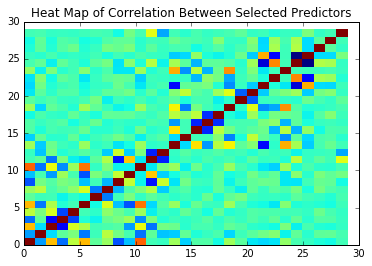

In [111]:
cor_matrix = np.ones((prediction_matrix.shape[1],prediction_matrix.shape[1]))

# calculate correlations for each pair, put in respective positions in matrix 

for i in range(prediction_matrix.shape[1]-1):
    for j in range(i+1,prediction_matrix.shape[1]):
        cor_matrix[i,j] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
        cor_matrix[j,i] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
    
# add row and column labels
    
cor_matrix = pd.DataFrame(cor_matrix, columns=prediction_matrix.columns.values)

#  print cor_matrix.iloc[28,range(20,70)]

# Plot the Color Map (using the pcolor fucntion from lab)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolor(cor_matrix)
ax.set_title("Heat Map of Correlation Between Selected Predictors")

# saves file for use in poster
plt.savefig('selected_predictors')

plt.show()



We'll add some basic info to the end of each observation, including team name, team region-seed, round, year, and the outcome of the game (as binary and point differential)

In [112]:
# adds years to prediction matrix
prediction_matrix['round'] = tourneydetailed['round']
prediction_matrix['Year'] = tourneydetailed['Season']

# adds two columns for point differential and win/loss
prediction_matrix['win_or_loss'] = prediction_answers
prediction_matrix['pt_diff'] = prediction_answers2


for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"] > tourneydetailed.ix[i,"LSeedNum"]):
        prediction_matrix.ix[i,'team1name'] = tourneydetailed.ix[i,'LKen_Name']
        prediction_matrix.ix[i,'team2name'] = tourneydetailed.ix[i,'WKen_Name']
        prediction_matrix.ix[i,'team1spot'] = tourneydetailed.ix[i,'LSeed']
        prediction_matrix.ix[i,'team2spot'] = tourneydetailed.ix[i,'WSeed']
    else: 
        prediction_matrix.ix[i,'team1name'] = tourneydetailed.ix[i,'WKen_Name']
        prediction_matrix.ix[i,'team2name'] = tourneydetailed.ix[i,'LKen_Name']
        prediction_matrix.ix[i,'team1spot'] = tourneydetailed.ix[i,'WSeed']
        prediction_matrix.ix[i,'team2spot'] = tourneydetailed.ix[i,'LSeed']

In [113]:
prediction_matrix.to_csv('pred_matrix2.csv', index_label = False)

**Prepping 2016 data**

Here, we do the same types of transformations as above. It had to be done slightly differently since there weren't any 2016 tournament games in the 2016 tournament database. 

In [166]:
# get the seeding info for the teams

seeds16 = tourneyseeds[(tourneyseeds['Season']==2016)]

# eliminate teams who lost in play-in games

seeds16 = seeds16[seeds16["Team"] != 1409]
seeds16 = seeds16[seeds16["Team"] != 1192]
seeds16 = seeds16[seeds16["Team"] != 1435]
seeds16 = seeds16[seeds16["Team"] != 1380]

seeds16 = seeds16.reset_index(drop=True)

# get number of seed

for i in range(0, len(seeds16)):
    if (len(seeds16.ix[i,"Seed"]) == 4):
        seeds16.ix[i,"Seed"] = seeds16.ix[i,"Seed"][0:3]

In [167]:
# get kenpom info for 2016

kenpom16 = kenpom[kenpom['Year']==2016]
kenpom16 = kenpom16.reset_index(drop=True)

In [168]:
# add the Kenpom name to the 2016 seeding database

for i in range(64):
    seeds16.ix[i,'Ken_Name'] = teams['Ken_Name'][teams['Team_Id']==seeds16.ix[i,'Team']].values[0]

# change Middle Tennessee St. to Middle Tennessee
    
seeds16.ix[30,'Ken_Name'] = "Middle Tennessee"
        


In [169]:
# accumulate reg season stats of winner, loser

new_tourney_stats = pd.DataFrame(np.zeros((len(seeds16),30)))


for i in range(0,len(new_tourney_stats)):
    for j in range(0,30):
        new_tourney_stats.iloc[i,j] = np.mean(np.append(regdetailed[key.iloc[j,2]]
                                            [(regdetailed['WteamID']==seeds16.ix[i,'Team_Id'])],
                                            regdetailed[key.iloc[j,1]]
                                            [(regdetailed['LteamID']==seeds16.ix[i,'Team_Id'])]))




In [170]:
# get weighted wins metric for 2016 teams 

def team_performance_lookup2 (teamID, regdetailed):
    # creates empty dataframe
    df = pd.DataFrame()
    
    # these are the IDs of every tournament team that this team beat 
    good_wins = regdetailed[regdetailed['WteamID'].isin([teamID])]['LteamID']
    
    # these are the IDs of every tournament team that beat this team
    meh_losses = regdetailed[regdetailed['LteamID'].isin([teamID])]['WteamID']
    
    # want to selected second column b/c first is index
    # calculates for 
    good_win_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(good_wins)]

    # combines the wins together, takes only the seed number
    good_win_seeds = good_win_seeds.map(lambda x: float(1) / int(x))
        
    meh_losses_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(meh_losses)]
    
    meh_losses_seeds = meh_losses_seeds.map(lambda x: float(1) / int(x))
    
    good_win_sum = np.sum(good_win_seeds)**.5
    meh_losses_sum = np.sum(meh_losses_seeds)**.5
    
    #print good_wins.shape
    return teamID, good_win_sum, meh_losses_sum

teams_seeded_wins16 = []


for team in seeds16['Team_Id']:
    teams_seeded_wins16.append(team_performance_lookup2(team, regdetailed))
    

teams_seeded_wins16 = pd.DataFrame(teams_seeded_wins16, columns = ['ID', 'good_win', 'meh_losses'])

In [171]:
# compile each team's stats into a dataframe that can be used in the analysis portion to create potential matchups. 

teamstats16 = pd.DataFrame(np.zeros((len(seeds16),38)))

for i in range(0,len(seeds16)):
    y = pd.concat([new_tourney_stats.iloc[i,:], 
    pd.Series(kenpom16['EM'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['AdjOE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['AdjDE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['AdjTempo'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['RankAdjDE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['RankAdjOE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(int(seeds16.ix[i,'SeedNum'])**.5),
    pd.Series(np.array(teams_seeded_wins16.iloc[:,range(1,2)][teams_seeded_wins16.iloc[:,0]==seeds16.ix[i,"Team_Id"]].values).reshape(1,))], axis=0)
    teamstats16.iloc[i,:] = np.array(y)
teamstats16 = pd.DataFrame(teamstats16)                    

In [172]:
# add column names

teamstats16.columns = ['team1scorefor','team12fgperfor', 'team13fgperfor','team1orfor','team1drfor','team1astfor','team1tofor','team1stlfor','team1blkfor','team1pffor','team1astratiofor','team1drratiofor','team1orratiofor','team1pot3ptsfor','team1potftptsfor','team1scoreag','team12fgperag', 'team13fgperag','team1orag','team1drag','team1astag','team1toag','team1stlag','team1blkag','team1pfag','team1astratioag','team1drratioag','team1orratioag','team1pot3ptsag','team1potftptsag',
                             'team1ken', 'team1kenoe','team1kende', 'team1kentempo','team1drank','team1orank',
                             'team1seed',
                             'team1goodwins']


In [173]:
# drop variables that were dropped above 

teamstats16 = teamstats16.drop(['team1ken'],axis=1)
teamstats16 = teamstats16.drop(['team1scorefor','team1scoreag','team1orfor','team1orag'],axis=1)
teamstats16 = teamstats16.drop(['team1astfor','team1astag'],axis=1)
teamstats16 = teamstats16.drop(['team1drratioag','team1orratioag'],axis=1)
teamstats16 = teamstats16.drop(['team1drank','team1orank'],axis=1)
teamstats16 = teamstats16.drop(['team1drfor','team1drag'                          
                                           ],axis=1)

teamstats16 = teamstats16.drop(['team12fgperfor','team12fgperag',
                                        
                                           'team13fgperfor','team13fgperag',
                                          
                                           'team1pffor','team1pfag',
                                           
                                           
                                            'team1stlfor','team1stlag',                                           
                                           ],axis=1)

teamstats16 = teamstats16.drop(['team1blkfor', 'team1astratiofor','team1blkag','team1astratioag'],axis=1)

In [176]:
teamstats16.columns

Index([u'team1tofor', u'team1drratiofor', u'team1orratiofor',
       u'team1pot3ptsfor', u'team1potftptsfor', u'team1toag',
       u'team1pot3ptsag', u'team1potftptsag', u'team1kenoe', u'team1kende',
       u'team1kentempo', u'team1seed', u'team1goodwins'],
      dtype='object')

In [178]:
# standardize variables

from sklearn import preprocessing
teamstats16 = preprocessing.scale(teamstats16)
teamstats16 = pd.DataFrame(teamstats16)

# add name and region-seed

for i in range(0,len(seeds16)):
    teamstats16.ix[i,'team1name'] = seeds16.ix[i,'Ken_Name']
    teamstats16.ix[i,'team1spot'] = seeds16.ix[i,'Seed']

    




In [179]:
# re-add column names 

teamstats16.columns = ['team1tofor', 'team1drratiofor', 'team1orratiofor',
       'team1pot3ptsfor', 'team1potftptsfor', 'team1toag',
       'team1pot3ptsag',
       'team1potftptsag', 'team1kentempo', 'team1kenoe', 'team1kende',
       'team1seed',
        'team1goodwins', 'team1name','team1spot']
teamstats16.to_csv('info2016.csv', index_label = False)

In [181]:
tourneydetailed

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,LDERank,WDERank,LOERank,WOERank,LSeed,WSeed,WSeedNum,LSeedNum,Play-In,round
0,2003,136,1112,80,1436,51,N,0,31,66,...,115.0,9.0,179.0,12.0,Z16,Z01,1.0,16.0,0.0,1.0
1,2003,136,1113,84,1272,71,N,0,31,59,...,25.0,59.0,33.0,22.0,Z07,Z10,10.0,7.0,0.0,1.0
2,2003,136,1141,79,1166,73,N,0,29,53,...,43.0,117.0,21.0,46.0,Z06,Z11,11.0,6.0,0.0,1.0
3,2003,136,1143,76,1301,74,N,1,27,64,...,93.0,51.0,34.0,57.0,W09,W08,8.0,9.0,0.0,1.0
4,2003,136,1163,58,1140,53,N,0,17,52,...,14.0,21.0,44.0,36.0,X12,X05,5.0,12.0,0.0,1.0
5,2003,136,1181,67,1161,57,N,0,19,54,...,217.0,27.0,32.0,9.0,Z14,Z03,3.0,14.0,0.0,1.0
6,2003,136,1211,74,1153,69,N,0,20,47,...,11.0,82.0,110.0,25.0,Z08,Z09,9.0,8.0,0.0,1.0
7,2003,136,1228,65,1443,60,N,0,24,56,...,66.0,8.0,67.0,18.0,Z13,Z04,4.0,13.0,0.0,1.0
8,2003,136,1242,64,1429,61,N,0,28,51,...,131.0,3.0,81.0,17.0,Z15,Z02,2.0,15.0,0.0,1.0
9,2003,136,1266,72,1221,68,N,0,22,51,...,35.0,76.0,121.0,2.0,Y14,Y03,3.0,14.0,0.0,1.0
